In [1]:
using ElectromagneticFields.Solovev

┌ Info: Precompiling ElectromagneticFields [d6c1ba6f-ee03-53af-b876-68cefeb88ec8]
└ @ Base loading.jl:1278
┌ Info: Skipping precompilation since __precompile__(false). Importing ElectromagneticFields [d6c1ba6f-ee03-53af-b876-68cefeb88ec8].
└ @ Base loading.jl:1034


In [2]:
using Plots

In [3]:
eq = Solovev.ITER() # load equilibrium with ITER parameters

SolovevEquilibrium Equilibrium with
  R₀ = 6.2
  B₀ = 5.3
  ϵ  = 0.32
  κ  = 1.7
  δ  = 0.33
  α  = -0.155

In [4]:
nr = 100
nz = 120
nl = 10
;

In [5]:
t = 0
xgrid = LinRange( 0.5,   1.5, nr)
ygrid = LinRange(-0.75, +0.75, nz)
;

In [6]:
field = zeros((nr,nz))
potAR = zeros((nr,nz))
potAZ = zeros((nr,nz))
;

In [7]:
for i in 1:nr
    for j in 1:nz
        field[i,j] = B(t, xgrid[i], ygrid[j], 0.0)
        potAR[i,j] = A₁(t, xgrid[i], ygrid[j], 0.0)
        potAZ[i,j] = A₂(t, xgrid[i], ygrid[j], 0.0)
    end
end

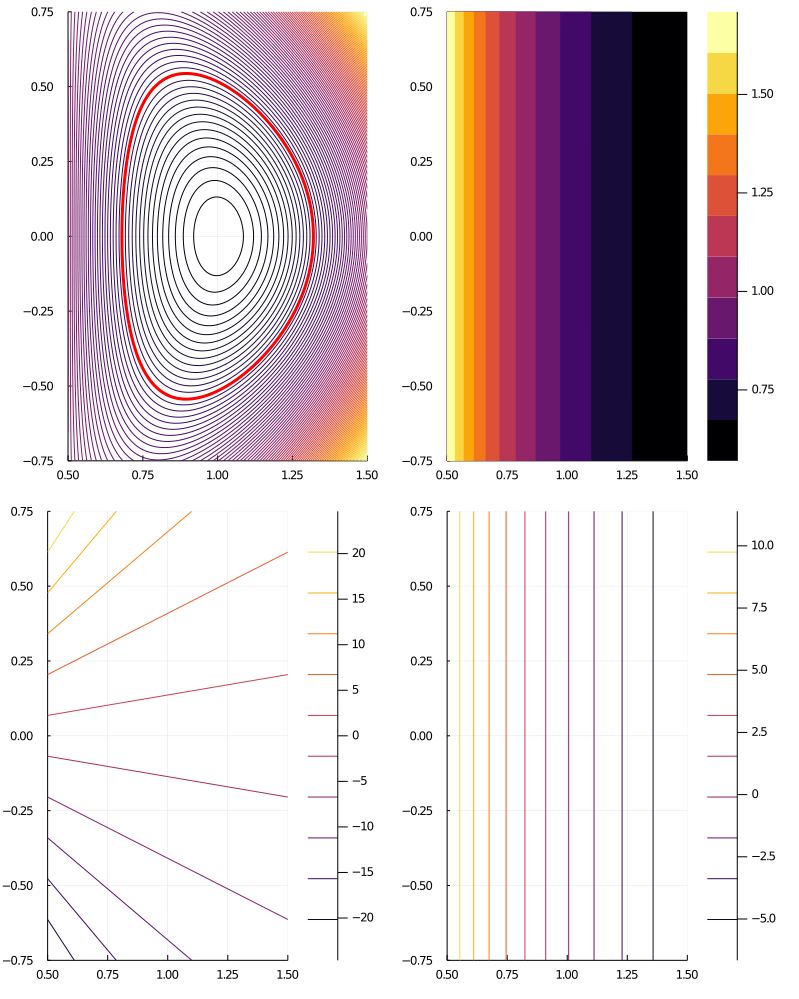

In [8]:
plotAP = plot(eq, levels=100)
plotB  = contour(xgrid, ygrid, field', levels=nl, linewidth=0, fillrange=true)
plotAR = contour(xgrid, ygrid, potAR', levels=nl)
plotAZ = contour(xgrid, ygrid, potAZ', levels=nl)
plot(plotAP, plotB, plotAR, plotAZ, layout=(2,2), size=(800,1000), fmt=:png)